# Kaggle Competition - TMDB Box Office Prediction <br> 
#### Name - Aryan Agrawal


### Section 1 - Loading Data and Basic Insights
- Load Data into kaggle/input directories 
- Explore the data to form intial intuitions 

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')
test_data = pd.read_csv("/kaggle/input/tmdb-box-office-prediction/test.csv")

In [315]:
train_data.index = train_data['id']
test_data.index = test_data['id']

print(train_data.shape)
print(test_data.shape)
train_data.head()

(3000, 23)
(4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [316]:
test_data.head() 

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
3001,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
3003,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3004,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
3005,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [317]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [318]:
test_data.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [319]:
train_data.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

In [320]:
test_data.isnull().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
id                          0
dtype: int64

- we observe that a lot of the columns have null values. Especially belongs to collection seems to be empty

### Section 2: Fixing Discrepancies in Data

- Observing the sample with id 16, we see that the revenue is listed as 198. Checking with google we find that this wrong and in fact the revenue should be 192684 dollars.

In [321]:
train_data[15:16]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
16,16,NaN,500000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://skinningmovie.com/synopsis.htm,tt1129437,sr,Šišanje,Novica is a mathematics champion in a Belgrade...,1.018477,...,10/6/10,97.0,"[{'iso_639_1': 'sr', 'name': 'Srpski'}]",Released,Life is sometimes rude game: one mistake can b...,Skinning,"[{'id': 379, 'name': 'skinhead'}, {'id': 7492,...","[{'cast_id': 1001, 'character': 'Novica', 'cre...","[{'credit_id': '52fe4927c3a36847f818bb5f', 'de...",198


- Similarly here a revenue of 30 is reported,which in fact seems correct. However we find that the budget is over reported

In [322]:
train_data[1006:1007]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1007,1007,NaN,2000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0429277,en,Zyzzyx Road,A married man (Leo Grillo) meets a beautiful w...,0.717595,...,2/25/06,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Dead Ahead,Zyzzyx Road,"[{'id': 9937, 'name': 'suspense'}]","[{'cast_id': 1, 'character': 'Marissa', 'credi...","[{'credit_id': '52fe45c6c3a36847f80d9bd3', 'de...",30


- We now fix all such discrepancies in data 

In [323]:
train_data.loc[train_data['id'] == 16,'revenue'] = 192864         
train_data.loc[train_data['id'] == 90,'budget'] = 30000000                  
train_data.loc[train_data['id'] == 118,'budget'] = 60000000       
train_data.loc[train_data['id'] == 149,'budget'] = 18000000       
train_data.loc[train_data['id'] == 313,'revenue'] = 12000000       
train_data.loc[train_data['id'] == 451,'revenue'] = 12000000      
train_data.loc[train_data['id'] == 464,'budget'] = 20000000       
train_data.loc[train_data['id'] == 470,'budget'] = 13000000       
train_data.loc[train_data['id'] == 513,'budget'] = 930000         
train_data.loc[train_data['id'] == 797,'budget'] = 8000000        
train_data.loc[train_data['id'] == 819,'budget'] = 90000000       
train_data.loc[train_data['id'] == 850,'budget'] = 90000000       
train_data.loc[train_data['id'] == 1007,'budget'] = 2              
train_data.loc[train_data['id'] == 1112,'budget'] = 7500000       
train_data.loc[train_data['id'] == 1131,'budget'] = 4300000        
train_data.loc[train_data['id'] == 1359,'budget'] = 10000000       
train_data.loc[train_data['id'] == 1542,'budget'] = 1             
train_data.loc[train_data['id'] == 1570,'budget'] = 15800000       
train_data.loc[train_data['id'] == 1571,'budget'] = 4000000        
train_data.loc[train_data['id'] == 1714,'budget'] = 46000000       
train_data.loc[train_data['id'] == 1721,'budget'] = 17500000       
train_data.loc[train_data['id'] == 1865,'revenue'] = 25000000      
train_data.loc[train_data['id'] == 1885,'budget'] = 12             
train_data.loc[train_data['id'] == 2091,'budget'] = 10             
train_data.loc[train_data['id'] == 2268,'budget'] = 17500000       
train_data.loc[train_data['id'] == 2491,'budget'] = 6              
train_data.loc[train_data['id'] == 2602,'budget'] = 31000000       
train_data.loc[train_data['id'] == 2612,'budget'] = 15000000       
train_data.loc[train_data['id'] == 2696,'budget'] = 10000000      
train_data.loc[train_data['id'] == 2801,'budget'] = 10000000       
train_data.loc[train_data['id'] == 335,'budget'] = 2 
train_data.loc[train_data['id'] == 348,'budget'] = 12
train_data.loc[train_data['id'] == 470,'budget'] = 13000000 
train_data.loc[train_data['id'] == 513,'budget'] = 1100000
train_data.loc[train_data['id'] == 640,'budget'] = 6 
train_data.loc[train_data['id'] == 696,'budget'] = 1
train_data.loc[train_data['id'] == 797,'budget'] = 8000000 
train_data.loc[train_data['id'] == 850,'budget'] = 1500000
train_data.loc[train_data['id'] == 1199,'budget'] = 5 
train_data.loc[train_data['id'] == 1282,'budget'] = 9              
train_data.loc[train_data['id'] == 1347,'budget'] = 1
train_data.loc[train_data['id'] == 1755,'budget'] = 2
train_data.loc[train_data['id'] == 1801,'budget'] = 5
train_data.loc[train_data['id'] == 1918,'budget'] = 592 
train_data.loc[train_data['id'] == 2033,'budget'] = 4
train_data.loc[train_data['id'] == 2118,'budget'] = 344 
train_data.loc[train_data['id'] == 2252,'budget'] = 130
train_data.loc[train_data['id'] == 2256,'budget'] = 1 
train_data.loc[train_data['id'] == 2696,'budget'] = 10000000

In [324]:
test_data.loc[test_data['id'] == 3033,'budget'] = 250 
test_data.loc[test_data['id'] == 3051,'budget'] = 50
test_data.loc[test_data['id'] == 3084,'budget'] = 337
test_data.loc[test_data['id'] == 3224,'budget'] = 4  
test_data.loc[test_data['id'] == 3594,'budget'] = 25  
test_data.loc[test_data['id'] == 3619,'budget'] = 500  
test_data.loc[test_data['id'] == 3831,'budget'] = 3  
test_data.loc[test_data['id'] == 3935,'budget'] = 500  
test_data.loc[test_data['id'] == 4049,'budget'] = 995946 
test_data.loc[test_data['id'] == 4424,'budget'] = 3  
test_data.loc[test_data['id'] == 4460,'budget'] = 8  
test_data.loc[test_data['id'] == 4555,'budget'] = 1200000 
test_data.loc[test_data['id'] == 4624,'budget'] = 30 
test_data.loc[test_data['id'] == 4645,'budget'] = 500 
test_data.loc[test_data['id'] == 4709,'budget'] = 450 
test_data.loc[test_data['id'] == 4839,'budget'] = 7
test_data.loc[test_data['id'] == 3125,'budget'] = 25 
test_data.loc[test_data['id'] == 3142,'budget'] = 1
test_data.loc[test_data['id'] == 3201,'budget'] = 450
test_data.loc[test_data['id'] == 3222,'budget'] = 6
test_data.loc[test_data['id'] == 3545,'budget'] = 38
test_data.loc[test_data['id'] == 3670,'budget'] = 18
test_data.loc[test_data['id'] == 3792,'budget'] = 19
test_data.loc[test_data['id'] == 3881,'budget'] = 7
test_data.loc[test_data['id'] == 3969,'budget'] = 400
test_data.loc[test_data['id'] == 4196,'budget'] = 6
test_data.loc[test_data['id'] == 4221,'budget'] = 11
test_data.loc[test_data['id'] == 4222,'budget'] = 500
test_data.loc[test_data['id'] == 4285,'budget'] = 11
test_data.loc[test_data['id'] == 4319,'budget'] = 1
test_data.loc[test_data['id'] == 4639,'budget'] = 10
test_data.loc[test_data['id'] == 4719,'budget'] = 45
test_data.loc[test_data['id'] == 4822,'budget'] = 22
test_data.loc[test_data['id'] == 4829,'budget'] = 20
test_data.loc[test_data['id'] == 4969,'budget'] = 20
test_data.loc[test_data['id'] == 5021,'budget'] = 40 
test_data.loc[test_data['id'] == 5035,'budget'] = 1 
test_data.loc[test_data['id'] == 5063,'budget'] = 14 
test_data.loc[test_data['id'] == 5119,'budget'] = 2 
test_data.loc[test_data['id'] == 5214,'budget'] = 30 
test_data.loc[test_data['id'] == 5221,'budget'] = 50 
test_data.loc[test_data['id'] == 4903,'budget'] = 15
test_data.loc[test_data['id'] == 4983,'budget'] = 3
test_data.loc[test_data['id'] == 5102,'budget'] = 28
test_data.loc[test_data['id'] == 5217,'budget'] = 75
test_data.loc[test_data['id'] == 5224,'budget'] = 3 
test_data.loc[test_data['id'] == 5469,'budget'] = 20 
test_data.loc[test_data['id'] == 5840,'budget'] = 1 
test_data.loc[test_data['id'] == 5960,'budget'] = 30
test_data.loc[test_data['id'] == 6506,'budget'] = 11 
test_data.loc[test_data['id'] == 6553,'budget'] = 280
test_data.loc[test_data['id'] == 6561,'budget'] = 7
test_data.loc[test_data['id'] == 6582,'budget'] = 218
test_data.loc[test_data['id'] == 6638,'budget'] = 5
test_data.loc[test_data['id'] == 6749,'budget'] = 8 
test_data.loc[test_data['id'] == 6759,'budget'] = 50 
test_data.loc[test_data['id'] == 6856,'budget'] = 10
test_data.loc[test_data['id'] == 6858,'budget'] =  100
test_data.loc[test_data['id'] == 6876,'budget'] =  250
test_data.loc[test_data['id'] == 6972,'budget'] = 1
test_data.loc[test_data['id'] == 7079,'budget'] = 8000000
test_data.loc[test_data['id'] == 7150,'budget'] = 118
test_data.loc[test_data['id'] == 6506,'budget'] = 118
test_data.loc[test_data['id'] == 7225,'budget'] = 6
test_data.loc[test_data['id'] == 7231,'budget'] = 85
test_data.loc[test_data['id'] == 5222,'budget'] = 5
test_data.loc[test_data['id'] == 5322,'budget'] = 90
test_data.loc[test_data['id'] == 5350,'budget'] = 70
test_data.loc[test_data['id'] == 5378,'budget'] = 10
test_data.loc[test_data['id'] == 5545,'budget'] = 80
test_data.loc[test_data['id'] == 5810,'budget'] = 8
test_data.loc[test_data['id'] == 5926,'budget'] = 300
test_data.loc[test_data['id'] == 5927,'budget'] = 4
test_data.loc[test_data['id'] == 5986,'budget'] = 1
test_data.loc[test_data['id'] == 6053,'budget'] = 20
test_data.loc[test_data['id'] == 6104,'budget'] = 1
test_data.loc[test_data['id'] == 6130,'budget'] = 30
test_data.loc[test_data['id'] == 6301,'budget'] = 150
test_data.loc[test_data['id'] == 6276,'budget'] = 100
test_data.loc[test_data['id'] == 6473,'budget'] = 100
test_data.loc[test_data['id'] == 6842,'budget'] = 30 

#### Section 3: Making the Data Usable 
- Converting the JSON format to a list of dictionaries
- Converting the release data into a more usable format



In [325]:
train_data['genres'][2]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

- As we can see the above is returned as an object. We need to convert this into something usable by python (i.e in the above example a list of dictonaries)

In [326]:
import ast
json_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def json_to_dict(data):
    for column in json_columns:
        data[column] = data[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return data
        
train_dict = json_to_dict(train_data)
test_dict = json_to_dict(test_data) 

for col in json_columns:
    train_data[col]=train_dict[col]
    test_data[col]=test_dict[col]


In [327]:
from datetime import datetime

def date(x):
    x=str(x).split()[0]
    year=x.split('/')[2]    
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
train_data['release_date'] =train_data['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test_data['release_date']  =test_data['release_date'].fillna('1/1/90').apply(lambda x: date(x))

train_data['release_date'] = train_data['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test_data['release_date']  = test_data['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

train_data['release_day']   = train_data['release_date'].apply(lambda x:x.weekday())
train_data['release_month'] = train_data['release_date'].apply(lambda x:x.month)
train_data['release_year']  = train_data['release_date'].apply(lambda x:x.year)

test_data['release_day']   = test_data['release_date'].apply(lambda x:x.weekday())
test_data['release_month'] = test_data['release_date'].apply(lambda x:x.month)
test_data['release_year']  = test_data['release_date'].apply(lambda x:x.year)

All features seem to be objects (since file is JSON). We need to convert all the text columns. 

#### Section 4: EDA 
- From the above basic insights we can hypothesise that the revenue should depend heavily on the budget, popularity

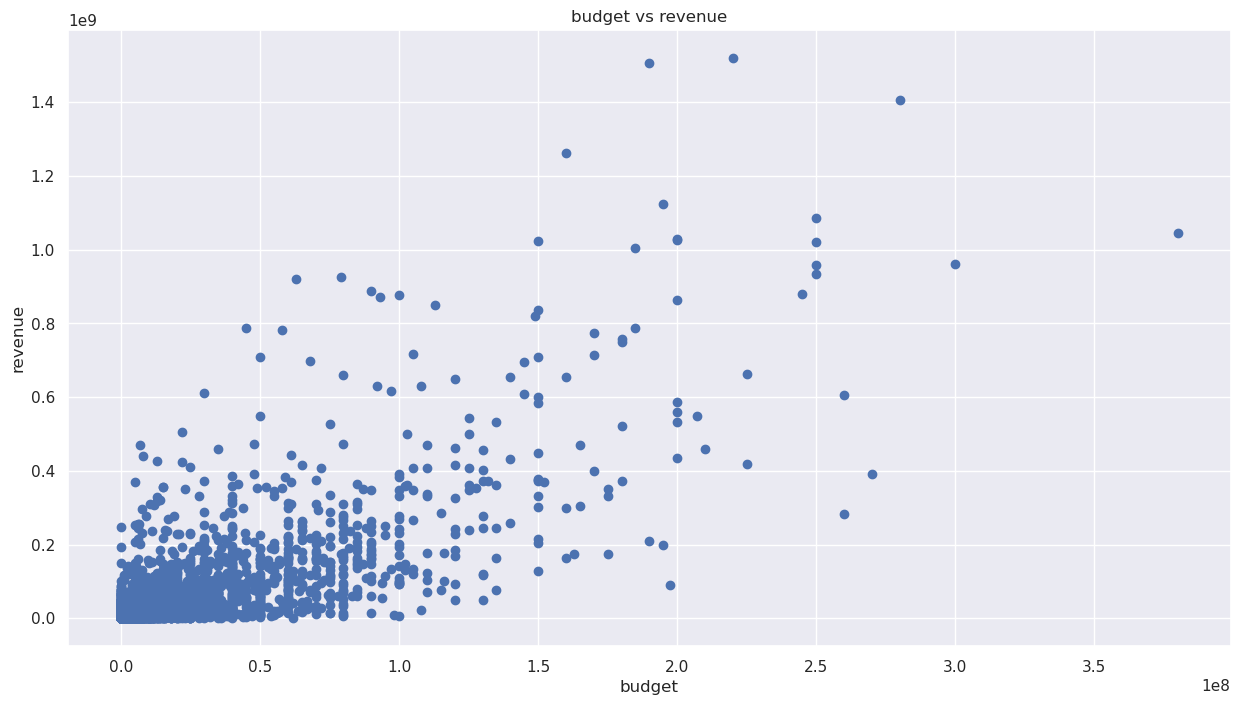

In [328]:
plt.title('budget vs revenue')
plt.xlabel( 'budget')
plt.ylabel('revenue')
plt.scatter(x=train_data['budget'], y=train_data['revenue'])

- we see a strong correlation between budget and revenue. However to get a better distribution we should perhaps use log transform on the budget

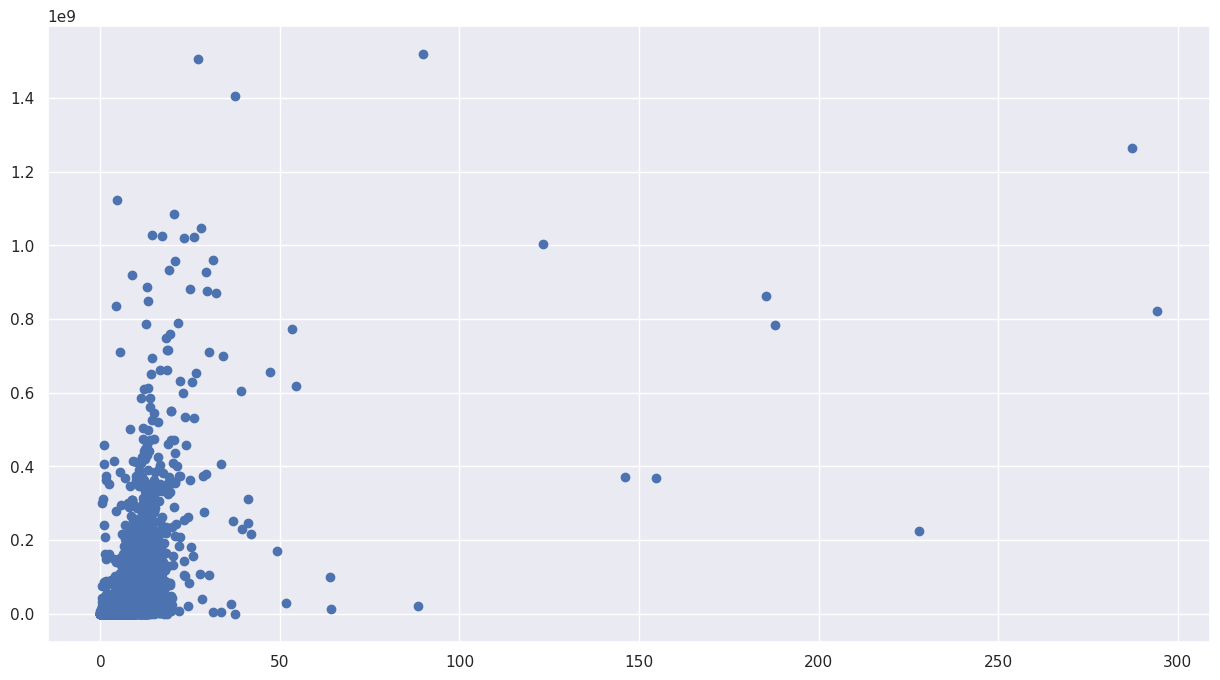

In [329]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
plt.scatter('popularity','revenue',data=train_data)
plt.show()

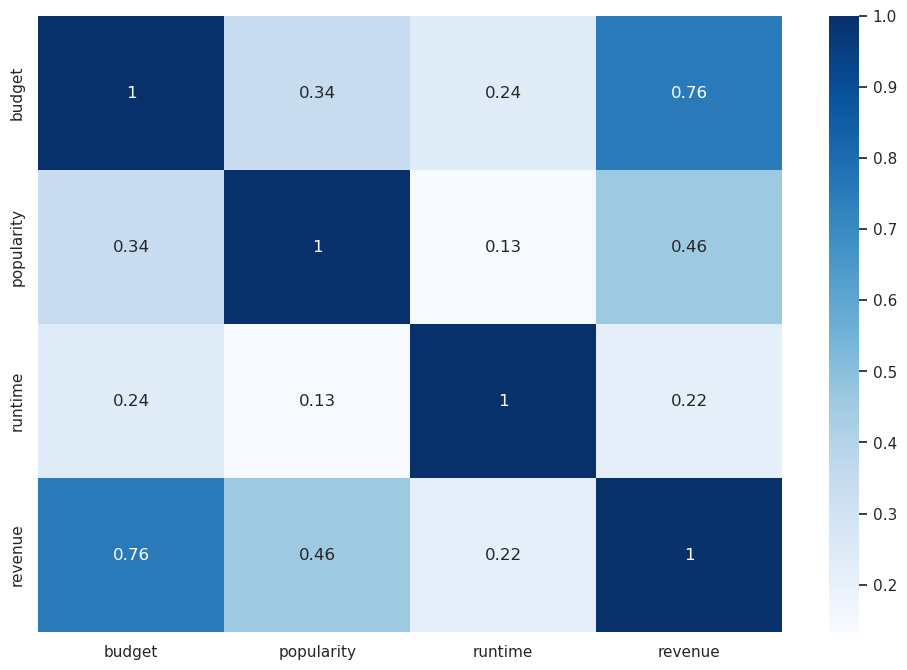

In [330]:
corr =train_data.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [331]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

le = LabelEncoder()

def preprocess_dataset(data): 
    #1 : Dealing with all textual data 
    
    data['production_countries_count'] = data['production_countries'].apply(lambda x : len(x))
    data['production_companies_count'] = data['production_companies'].apply(lambda x : len(x)) 
    data['cast_count'] = data['cast'].apply(lambda x : len(x))
    data['crew_count'] = data['crew'].apply(lambda x : len(x))
    
    #count word or characters in tagline, title, overview
    data['original_title_letter_count'] = data['original_title'].str.len() 
    data['original_title_word_count'] = data['original_title'].str.split().str.len() 
    data['title_word_count'] = data['title'].str.split().str.len()
    data['overview_word_count'] = data['overview'].str.split().str.len()
    data['tagline_word_count'] = data['tagline'].str.split().str.len()
    
        
    #check if movie has been released 
    data['ismovie_released']=1
    data.loc[(data['status']!='Released'),'ismovie_released']=0
    
    
    data['num_spoken_languages']=data['spoken_languages'].apply(lambda x: len(x))
    
    #bleongs to collection
    data['belongs_to_collection']= data['belongs_to_collection'].apply(lambda x: 1 if x != {} else 0)
    
    #homepage 
    data['has_homepage'] = 1
    data.loc[ pd.isnull(data['homepage']),'has_homepage'] = 0
    
    
    data['num_genres'] = data['genres'].apply(lambda x: len(x) if x != {} else 0)
    
    #log transform the budget 
    data['budget'] = np.log1p(data['budget'])
    
    #if there is a tagline 
    data['isTaglineNA'] = data['tagline'].apply( lambda x: 0 if pd.isnull(x) else 1)
    
    #if original language is english we give 1, otherwise 0 
    data['original_language'] = le.fit_transform(data['original_language'])    
    data['isOriginalLanguageEng'] = 0 
    data.loc[ data['original_language'].astype(str) == "en" ,"isOriginalLanguageEng"] = 1 
    
    data['_budget_popularity_ratio'] = data['budget']/data['popularity']
    data['_budget_year_ratio'] = data['budget']/(data['release_year']*data['release_year'])
    data['_releaseYear_popularity_ratio'] = data['release_year']/data['popularity']
    data['_releaseYear_popularity_ratio2'] = data['popularity']/data['release_year']


    data['meanruntimeByYear'] = data.groupby("release_year")["runtime"].aggregate('mean')
    data['meanPopularityByYear'] = data.groupby("release_year")["popularity"].aggregate('mean')
    data['meanBudgetByYear'] = data.groupby("release_year")["budget"].aggregate('mean')
    
    data = data.drop(['homepage','tagline','poster_path','overview','genres',
                  'imdb_id','original_title','cast','Keywords','title',
                 'production_companies','production_countries',
                  'release_date','spoken_languages','crew','status'],axis=1)
    
    data.fillna(-1,inplace=True) #if any null values remain
    return data

train = preprocess_dataset(train_data)
test = preprocess_dataset(test_data)

In [332]:
train.head()

,id,belongs_to_collection,budget,original_language,popularity,runtime,revenue,release_day,release_month,release_year,...,num_genres,isTaglineNA,isOriginalLanguageEng,_budget_popularity_ratio,_budget_year_ratio,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,meanruntimeByYear,meanPopularityByYear,meanBudgetByYear
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,16.454568,7,6.575393,93.0,12314651,4,2,2015,...,1,1,0,2.502446,0.000004,306.445562,0.003263,-1.0,-1.0,-1.0
2,2,1,17.504390,7,8.248895,113.0,95149435,4,8,2004,...,4,1,0,2.122028,0.000004,242.941630,0.004116,-1.0,-1.0,-1.0
3,3,0,15.009433,7,64.299990,105.0,13092000,4,10,2014,...,1,1,0,0.233428,0.000004,31.321933,0.031927,-1.0,-1.0,-1.0
4,4,0,13.997833,13,3.174936,122.0,16000000,4,3,2012,...,2,0,0,4.408855,0.000003,633.713561,0.001578,-1.0,-1.0,-1.0
5,5,0,0.000000,18,1.148070,118.0,3923970,3,2,2009,...,2,0,0,0.000000,0.000000,1749.893299,0.000571,-1.0,-1.0,-1.0


In [333]:
print(train.shape)
print(test.shape)

(3000, 32)
(4398, 31)


#### Section 5: Training the Model

In [334]:
features = [ i for i in train.columns if i!='id' and i!='revenue']
X = train[features]
y = train['revenue']
X.describe()

,belongs_to_collection,budget,original_language,popularity,runtime,release_day,release_month,release_year,production_countries_count,production_companies_count,...,num_genres,isTaglineNA,isOriginalLanguageEng,_budget_popularity_ratio,_budget_year_ratio,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,meanruntimeByYear,meanPopularityByYear,meanBudgetByYear
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,0.201333,11.961359,8.299333,8.463274,107.784000,3.269333,6.775333,1999.713000,1.326333,2.698333,...,2.503667,0.801000,0.0,5.562497,0.000003,6.693419e+05,4.227358e-03,2.331694,-0.750040,-0.635182
std,0.401063,7.403049,4.626107,12.104000,22.257189,1.306150,3.409115,15.423313,0.752349,2.014121,...,1.117021,0.399315,0.0,82.063722,0.000002,3.629592e+07,6.009040e-03,19.166133,1.643469,2.148773
min,0.000000,0.000000,0.000000,0.000001,-1.000000,0.000000,1.000000,1921.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,6.852688e+00,5.030181e-10,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,7.000000,4.018053,94.000000,2.000000,4.000000,1993.000000,1.000000,1.000000,...,2.000000,1.000000,0.0,0.000000,0.000000,1.837562e+02,2.012961e-03,-1.000000,-1.000000,-1.000000
50%,0.000000,15.894952,7.000000,7.374861,104.000000,4.000000,7.000000,2004.000000,1.000000,2.000000,...,2.000000,1.000000,0.0,1.557586,0.000004,2.710090e+02,3.689915e-03,-1.000000,-1.000000,-1.000000
75%,0.000000,17.216708,7.000000,10.890983,118.000000,4.000000,10.000000,2011.000000,1.000000,4.000000,...,3.000000,1.000000,0.0,2.486544,0.000004,4.967813e+02,5.441993e-03,-1.000000,-1.000000,-1.000000
max,1.000000,19.755682,35.000000,294.337037,338.000000,6.000000,12.000000,2017.000000,8.000000,17.000000,...,7.000000,1.000000,0.0,4125.197543,0.000005,1.988000e+09,1.459281e-01,152.800000,46.880357,15.290749


In [339]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0)
clf.fit(X, y) 
y_pred_rf = clf.predict(test[features])

In [345]:
test['revenue'] =  y_pred_rf
test['revenue'] = test['revenue'].apply(lambda x: x if x > 0 else 0 )
test['revenue'] = test['revenue'].fillna(test['revenue'].mean())
test[['id','revenue']].to_csv('/kaggle/working/submission.csv', index=False)
test[['id','revenue']].head()

,id,revenue
id,,
3001,3001,9320100.98
3002,3002,16598900.19
3003,3003,6716686.03
3004,3004,37459922.71
3005,3005,7192538.89
